# Reconstruction and fast-fast MC in PETALO

In [1]:
# Add the line below so that plots will appear inline in the notebook.
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy  as np
#import nibabel as nib

import struct

import os
import sys
import shutil
import sirf.STIR as pet

## Read in the data

In [1233]:
def combine_datafiles(basedir,startfile,nfiles,outfile):
    """Read data files containing reconstructed coordinates and combine them into a single file.
    """

    a_event_ids = []

    a_true_r1 = []
    a_true_phi1 = []
    a_true_z1 = []
    a_true_t1 = []
    a_true_r2 = []
    a_true_phi2 = []
    a_true_z2 = []
    a_true_t2 = []

    a_reco_r1 = []
    a_reco_phi1 = []
    a_reco_z1 = []
    a_reco_r2 = []
    a_reco_phi2 = []
    a_reco_z2 = []

    for ii in range(nfiles):

        fnum = startfile+ii
#         if(fnum < 10):
#             fnum = "00{}".format(fnum)
#         elif(fnum < 100):
#             fnum = "0{}".format(fnum)

        fname = "{}/phantom_NEMAlike_coincidences_{}.npz".format(basedir,fnum)
        if(os.path.isfile(fname)):

            print("Adding file {}...".format(fname))

            fn = np.load(fname)

            if(len(a_event_ids) > 0): a_event_ids = np.concatenate((a_event_ids,fn['a_event_ids']))
            else: a_event_ids = fn['a_event_ids']

            if(len(a_true_r1) > 0): a_true_r1 = np.concatenate((a_true_r1,fn['a_true_r1']))
            else: a_true_r1 = fn['a_true_r1']

            if(len(a_true_phi1) > 0): a_true_phi1 = np.concatenate((a_true_phi1,fn['a_true_phi1']))
            else: a_true_phi1 = fn['a_true_phi1']

            if(len(a_true_z1) > 0): a_true_z1 = np.concatenate((a_true_z1,fn['a_true_z1']))
            else: a_true_z1 = fn['a_true_z1']
                
            if(len(a_true_t1) > 0): a_true_t1 = np.concatenate((a_true_t1,fn['a_true_t1']))
            else: a_true_t1 = fn['a_true_t1']

            if(len(a_true_r2) > 0): a_true_r2 = np.concatenate((a_true_r2,fn['a_true_r2']))
            else: a_true_r2 = fn['a_true_r2']

            if(len(a_true_phi2) > 0): a_true_phi2 = np.concatenate((a_true_phi2,fn['a_true_phi2']))
            else: a_true_phi2 = fn['a_true_phi2']

            if(len(a_true_z2) > 0): a_true_z2 = np.concatenate((a_true_z2,fn['a_true_z2']))
            else: a_true_z2 = fn['a_true_z2']
                
            if(len(a_true_t2) > 0): a_true_t2 = np.concatenate((a_true_t2,fn['a_true_t2']))
            else: a_true_t2 = fn['a_true_t2']

            if(len(a_reco_r1) > 0): a_reco_r1 = np.concatenate((a_reco_r1,fn['a_reco_r1']))
            else: a_reco_r1 = fn['a_reco_r1']

            if(len(a_reco_phi1) > 0): a_reco_phi1 = np.concatenate((a_reco_phi1,fn['a_reco_phi1']))
            else: a_reco_phi1 = fn['a_reco_phi1']

            if(len(a_reco_z1) > 0): a_reco_z1 = np.concatenate((a_reco_z1,fn['a_reco_z1']))
            else: a_reco_z1 = fn['a_reco_z1']

            if(len(a_reco_r2) > 0): a_reco_r2 = np.concatenate((a_reco_r2,fn['a_reco_r2']))
            else: a_reco_r2 = fn['a_reco_r2']

            if(len(a_reco_phi2) > 0): a_reco_phi2 = np.concatenate((a_reco_phi2,fn['a_reco_phi2']))
            else: a_reco_phi2 = fn['a_reco_phi2']

            if(len(a_reco_z2) > 0): a_reco_z2 = np.concatenate((a_reco_z2,fn['a_reco_z2']))
            else: a_reco_z2 = fn['a_reco_z2']

        else:

            print("Skipping file {}...".format(fname))

        # Write a single file.
        np.savez(outfile, a_event_ids=a_event_ids,
                          a_true_r1=a_true_r1,a_true_phi1=a_true_phi1,a_true_z1=a_true_z1,a_true_t1=a_true_t1,
                          a_true_r2=a_true_r2,a_true_phi2=a_true_phi2,a_true_z2=a_true_z2,
                          a_reco_r1=a_reco_r1,a_reco_phi1=a_reco_phi1,a_reco_z1=a_reco_z1,a_true_t2=a_true_t2,
                          a_reco_r2=a_reco_r2,a_reco_phi2=a_reco_phi2,a_reco_z2=a_reco_z2)
        
def read_datafile(infile):

    fn = np.load(infile)

    a_event_ids = fn['a_event_ids']

    a_true_r1   = fn['a_true_r1']
    a_true_phi1 = fn['a_true_phi1']
    a_true_z1   = fn['a_true_z1']
    a_true_t1   = fn['a_true_t1']
    a_true_r2   = fn['a_true_r2']
    a_true_phi2 = fn['a_true_phi2']
    a_true_z2   = fn['a_true_z2']
    a_true_t2   = fn['a_true_t2']

    a_reco_r1   = fn['a_reco_r1']
    a_reco_phi1 = fn['a_reco_phi1']
    a_reco_z1   = fn['a_reco_z1']
    a_reco_r2   = fn['a_reco_r2']
    a_reco_phi2 = fn['a_reco_phi2']
    a_reco_z2   = fn['a_reco_z2']

    return (a_event_ids, a_true_r1, a_true_phi1, a_true_z1, a_true_t1,
                       a_true_r2, a_true_phi2, a_true_z2, a_true_t2,
                       a_reco_r1, a_reco_phi1, a_reco_z1,
                       a_reco_r2, a_reco_phi2, a_reco_z2)

In [1561]:
# Combine the data files if necessary.
outfile = '/home/jrenner/analysis/petalo/MC/phantom_NEMAlike_reco/phantom_NEMAlike_DNN.npz'
# if(not os.path.exists(outfile)):
#     combine_datafiles('/home/jrenner/analysis/petalo/MC/phantom_NEMAlike_reco', 500, 1500, outfile)
#outfile = 'mc_NEMAlike_10M_coslim_NN.npz'

In [1562]:
# Read in the LORs
(D_evt,D_true_r1,D_true_phi1,D_true_z1,D_true_t1,
 D_true_r2,D_true_phi2,D_true_z2,D_true_t2,
 D_reco_r1,D_reco_phi1,D_reco_z1,
 D_reco_r2,D_reco_phi2,D_reco_z2) = read_datafile(outfile)
print("Read {} coincidences".format(len(D_evt)))

Read 337628 coincidences


In [1563]:
# Read in the corresponding DNN processing.
fn = np.load('/home/jrenner/analysis/petalo/DNN_arrays_NEMA.npz')
D_evt2 = fn['b_event_ids']
D_line_cos = fn['b_line_cos']
D_line_dist = fn['b_line_dist']
D_LOR_zcos_true = fn['b_LOR_zcos_true']
D_LOR_zcos_reco = fn['b_LOR_zcos_reco']
D_qtf1 = fn['b_qtf1']
D_qtf2 = fn['b_qtf2']
D_qmaxf1 = fn['b_qmaxf1']
D_qmaxf2 = fn['b_qmaxf2']
D_zerr_pred1 = fn['b_zerr_pred1']
D_zerr_pred2 = fn['b_zerr_pred2']
D_phierr_pred1 = fn['b_phierr_pred1']
D_phierr_pred2 = fn['b_phierr_pred2']
print("Read {} entries.".format(len(D_qtf1)))

Read 337628 entries.


In [1568]:
# Define cuts
cut_qtf = 0.995
cut_qmax = 0.5
cut_zerr = 15
cut_phierr = 0.02

cuts_none = (D_evt >= 0)
cuts_qf = (D_qtf1 > cut_qtf) & (D_qtf2 > cut_qtf) #& (D_qmaxf1 < cut_qmax) & (D_qmaxf2 < cut_qmax)
cuts_DNN = (D_zerr_pred1 < cut_zerr) & (D_zerr_pred2 < cut_zerr) #& (D_phierr_pred1 < cut_phierr) & (D_phierr_pred2 < cut_phierr)

#cuts_all = cuts_none
cuts_all = cuts_DNN

In [1569]:
# Perform cuts
cut_reco_r1 = D_reco_r1[cuts_all]
cut_reco_phi1 = D_reco_phi1[cuts_all]
cut_reco_z1 = D_reco_z1[cuts_all]
cut_true_t1 = D_true_t1[cuts_all]
cut_reco_r2 = D_reco_r2[cuts_all]
cut_reco_phi2 = D_reco_phi2[cuts_all]
cut_reco_z2 = D_reco_z2[cuts_all]
cut_true_t2 = D_true_t2[cuts_all]

In [1570]:
print("Qtf cut {}:".format(1.0*len(D_reco_z1[cuts_qf])/len(D_reco_z1)))
print("DNN cut additional: {}".format(1.0*len(D_reco_z1[cuts_DNN])/len(D_reco_z1[cuts_qf])))
print("Total: {}".format(1.0*len(D_reco_z1[cuts_all])/len(D_reco_z1)))
print(len(cut_reco_r1))

Qtf cut 0.925195777601:
DNN cut additional: 0.810232671302
Total: 0.749623846363
253094


## Plots of reconstructed quantities

(-1.3, 1.3)

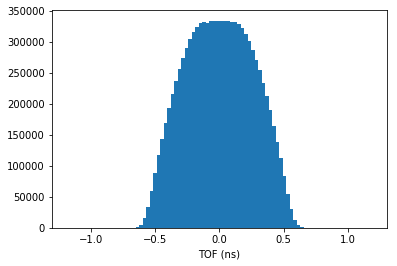

In [1527]:
TOF = np.array(D_true_t2) - np.array(D_true_t1)
plt.hist(TOF[(TOF < 1.5) & (TOF > -1.5)],bins=50)
plt.xlabel("TOF (ns)")
plt.xlim([-1.3,1.3])

In [1528]:
zerr_rng = 50
phierr_rng = 0.13
rerr_rng = 60

z_err1 = np.abs(D_true_z1-D_reco_z1)
z_err2 = np.abs(D_true_z2-D_reco_z2)
z_err_max = np.max([np.abs(z_err1),np.abs(z_err2)],axis=0)
z_err_pred_max = np.max([D_zerr_pred1, D_zerr_pred2],axis=0)

phi_err1 = D_true_phi1-D_reco_phi1
phi_err1[phi_err1 > np.pi] = phi_err1[phi_err1 > np.pi] - 2*np.pi  # correct for errors near 2pi
phi_err1[phi_err1 < -np.pi] = phi_err1[phi_err1 < -np.pi] + 2*np.pi  # correct for errors near 2pi
phi_err1 = np.abs(phi_err1)
phi_err2 = D_true_phi2-D_reco_phi2
phi_err2[phi_err2 > np.pi] = phi_err2[phi_err2 > np.pi] - 2*np.pi  # correct for errors near 2pi
phi_err2[phi_err2 < -np.pi] = phi_err2[phi_err2 < -np.pi] + 2*np.pi  # correct for errors near 2pi
phi_err2 = np.abs(phi_err2)
phi_err_max = np.max([np.abs(phi_err1),np.abs(phi_err2)],axis=0)
phi_err_pred_max = np.max([D_phierr_pred1, D_phierr_pred2],axis=0)

r_err1 = np.abs(D_true_r1-D_reco_r1)
r_err2 = np.abs(D_true_r2-D_reco_r2)
r_err_max = np.max([np.abs(r_err1),np.abs(r_err2)],axis=0)

# Error plots

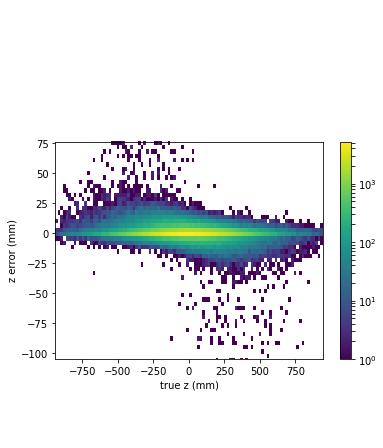

In [1571]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(D_true_z1[cuts_all],D_true_z1[cuts_all]-D_reco_z1[cuts_all],bins=100,norm=LogNorm())
#h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z,err_z,bins=100,norm=LogNorm())
plt.xlabel('true z (mm)')
plt.ylabel('z error (mm)')
plt.ylim([-105,76])
plt.colorbar()
#plt.savefig("errors_phi.png",bbox_inches='tight')
#print("After cuts, still have {} of events".format(len(true_z[z_cuts])/len(true_z)))

After cuts, still have 0.749623846363 of events


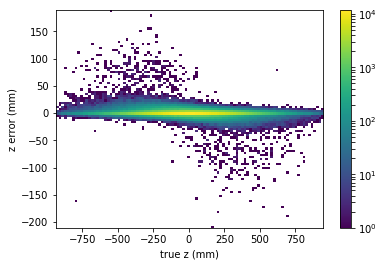

In [1572]:
# Save z-error matrix with NN cuts.
true_z = np.concatenate([D_true_z1[cuts_all],D_true_z2[cuts_all]])
err_z = np.concatenate([D_true_z1[cuts_all]-D_reco_z1[cuts_all],D_true_z2[cuts_all]-D_reco_z2[cuts_all]])
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z,err_z,bins=100,norm=LogNorm())
#h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z,err_z,bins=100,norm=LogNorm())
plt.xlabel('true z (mm)')
plt.ylabel('z error (mm)')
plt.colorbar()
#plt.savefig("errors_phi.png",bbox_inches='tight')
print("After cuts, still have {} of events".format(1.0*len(true_z)/(len(D_true_z1) + len(D_true_z2))))

# Save the error matrix for the fast MC.
eff = len(true_z)/(len(D_true_z1) + len(D_true_z2)); eff = np.array(eff)
xmin = xedges_z[0]; xmin = np.array(xmin)
ymin = yedges_z[0]; ymin = np.array(ymin)
dx = xedges_z[1:]-xedges_z[:-1]; dx = np.array(dx[0])
dy = yedges_z[1:]-yedges_z[:-1]; dy = np.array(dy[0])
np.savez("errmat_z_NN.npz", errmat=h_z, eff=eff, xmin=xmin, ymin=ymin, dx=dx, dy=dy)

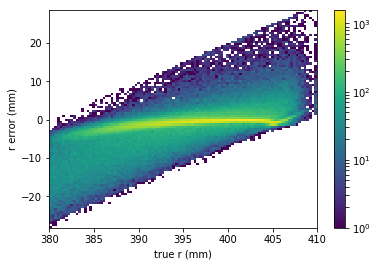

In [578]:
h_r, xedges_r, yedges_r, img_r = plt.hist2d(D_true_r1[cuts_all],D_true_r1[cuts_all]-D_reco_r1[cuts_all],bins=100,norm=LogNorm())
plt.xlabel('true r (mm)')
plt.ylabel('r error (mm)')
plt.colorbar()

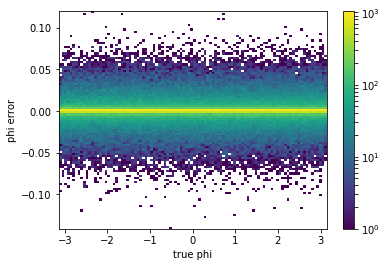

In [583]:
cuts_phi = cuts_all & (D_true_phi1-D_reco_phi1 < 3) & (D_true_phi1-D_reco_phi1 > -3)
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(D_true_phi1[cuts_phi],D_true_phi1[cuts_phi]-D_reco_phi1[cuts_phi],bins=100,norm=LogNorm())
plt.xlabel('true phi')
plt.ylabel('phi error')
plt.colorbar()

# DNN prediction plots

Text(0,0.5,'Predicted error, z (mm)')

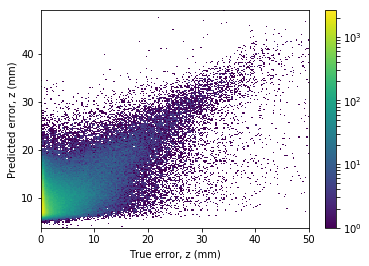

In [11]:
cuts_plt = cuts_qf & (z_err1 < 50) & (D_zerr_pred1 < 50)
h_z, xedges_z, yedges_z, img_z = plt.hist2d(z_err1[cuts_plt],D_zerr_pred1[cuts_plt],bins=200,norm=LogNorm())
plt.colorbar()
plt.xlabel("True error, z (mm)")
plt.ylabel("Predicted error, z (mm)")

Text(0,0.5,'Predicted error, z (mm)')

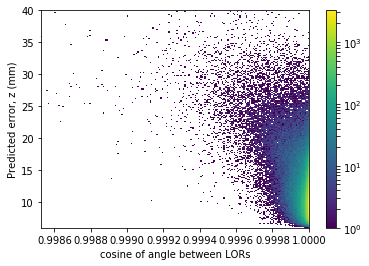

In [12]:
cuts_plt = cuts_qf & (D_line_cos > 0.9985) & (z_err_pred_max < 40) & (phi_err_max < 0.02)
h_z, xedges_z, yedges_z, img_z = plt.hist2d(D_line_cos[cuts_plt],z_err_pred_max[cuts_plt],bins=200,norm=LogNorm())
plt.colorbar()
plt.xlabel("cosine of angle between LORs")
plt.ylabel("Predicted error, z (mm)")

Text(0,0.5,'Predicted error, z (mm)')

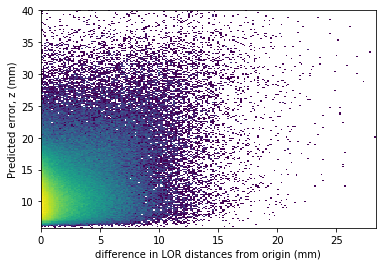

In [13]:
cuts_plt = cuts_qf & (D_line_dist > -30) & (D_line_dist < 30) & (z_err_pred_max < 40)
h_z, xedges_z, yedges_z, img_z = plt.hist2d(np.abs(D_line_dist[cuts_plt]),z_err_pred_max[cuts_plt],bins=200,norm=LogNorm())
plt.xlabel("difference in LOR distances from origin (mm)")
plt.ylabel("Predicted error, z (mm)")

In [ ]:
cuts_plt = cuts_qf & (phi_err1 < 0.10) & (D_phierr_pred1 < 0.13)
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(phi_err1[cuts_plt],D_phierr_pred1[cuts_plt],bins=200,norm=LogNorm())
plt.xlabel("True error, phi")
plt.ylabel("Predicted error, phi")

In [ ]:
cuts_plt = cuts_qf & (D_line_cos > 0.9985) & (phi_err_pred_max < 0.10)
h_z, xedges_z, yedges_z, img_z = plt.hist2d(D_line_cos[cuts_plt],phi_err_pred_max[cuts_plt],bins=200,norm=LogNorm())
plt.xlabel("cosine of angle between LORs")
plt.ylabel("Predicted error, phi")

In [ ]:
cuts_plt = cuts_qf & (D_line_dist > -30) & (D_line_dist < 30) & (phi_err_pred_max < 0.10)
h_z, xedges_z, yedges_z, img_z = plt.hist2d(np.abs(D_line_dist[cuts_plt]),phi_err_pred_max[cuts_plt],bins=200,norm=LogNorm())
plt.xlabel("difference in LOR distances from origin (mm)")
plt.ylabel("Predicted error, phi")

## Compute sinograms

In [1529]:
def compute_TOF_sinograms_hist(N_phi,size_u,N_u,size_v,N_v,size_TOF,N_TOF,LORs,theta_tol=np.pi/6):
    """ Compute the TOF sinograms.

        - LORs: the lines of response, stored in (r1,phi1,z1), (r2,phi2,z2) pairs as arrays: D_r1, D_phi1, D_z1, D_r2, D_phi2, D_z2
        - cos_tol: the tolerance for a LOR to be included in the projection for a given plane.  If the line of response makes
            an angle theta with the normal of the plane such that |cos(theta) - 1| < cos_tol, it is included in the projection.

    """    
    # Get the data vectors from the LORs.
    D_r1, D_phi1, D_z1, D_t1, D_r2, D_phi2, D_z2, D_t2 = LORs
    
    proj_matrix = np.zeros([N_TOF,N_v,N_phi,N_u])
    
    binsize_phi = np.pi/N_phi
    binsize_u = size_u/N_u
    binsize_v = size_v/N_v
    binsize_TOF = size_TOF/N_TOF

    half_u = size_u/2.0
    half_v = size_v/2.0
    half_TOF = size_TOF/2.0
    
    for r1,phi1,z1,t1,r2,phi2,z2,t2 in zip(D_r1,D_phi1,D_z1,D_t1,D_r2,D_phi2,D_z2,D_t2):

        x1 = r1*np.cos(phi1)
        y1 = r1*np.sin(phi1)
        x2 = r2*np.cos(phi2)
        y2 = r2*np.sin(phi2)
        tof = t1-t2

        lx = x2-x1; ly = y2-y1; lz = z2-z1                               # line vector: l = p2 - p1
        lr = (lx**2 + ly**2)**0.5
        phi = np.arctan2(ly,lx)
        theta = np.arctan2(lz,lr)
        
        if(phi < 0): 
            phi += np.pi
            tof *= -1
        
        if(abs(theta) < theta_tol):
            
            # Compute the normal vector for this plane.
            sin_phi = np.sin(phi); cos_phi = np.cos(phi)
            sin_theta = np.sin(theta); cos_theta = np.cos(theta)
            nx = cos_theta*cos_phi; ny = cos_theta*sin_phi; nz = sin_theta

            iparam = (x1*nx + y1*ny + z1*nz)/(lx*nx + ly*ny + lz*nz)         # intersection parameter
            xuv = x1 - lx*iparam; yuv = y1 - ly*iparam; zuv = z1 - lz*iparam # intersection point

            # Compute (u,v).
            u = xuv*sin_phi - yuv*cos_phi
            v = -xuv*sin_theta*cos_phi - yuv*sin_theta*sin_phi + zuv*cos_theta
            
            # Bin (u,v), phi, and TOF, and add to the projection.
            bu = int((u + half_u)/binsize_u)
            bv = int((v + half_v)/binsize_v)
            bphi = int((np.pi - phi)/binsize_phi)
            bTOF = int((tof + half_TOF)/binsize_TOF)
            if(bu >= 0 and bu < N_u and bv >= 0 and bv < N_v and bTOF >= 0 and bTOF < N_TOF):
                proj_matrix[bTOF,bv,bphi,bu] += 1
    
    
    return proj_matrix

In [1530]:
# Set up the binning.
N_axial = 64
N_u = 180
N_v = 1
size_u = 180
size_v = 5
size_TOF = 2.0 # total span of TOF bins in ns
N_TOF = 13

In [1548]:
# Compute the sinograms
#LORs = (D_true_r1,D_true_phi1,D_true_z1,D_true_t1,D_true_r2,D_true_phi2,D_true_z2,D_true_t2)
#LORs = (D_reco_r1,D_reco_phi1,D_reco_z1,D_true_t1,D_reco_r2,D_reco_phi2,D_reco_z2,D_true_t2)
#LORs = (cut_reco_r1,cut_reco_phi1,cut_reco_z1,cut_true_t1,cut_reco_r2,cut_reco_phi2,cut_reco_z2,cut_true_t2)
nNN = int(0.53547*len(cut_reco_r1)); LORs = (cut_reco_r1[0:nNN],cut_reco_phi1[0:nNN],cut_reco_z1[0:nNN],cut_true_t1[0:nNN],cut_reco_r2[0:nNN],cut_reco_phi2[0:nNN],cut_reco_z2[0:nNN],cut_true_t2[0:nNN])
sinograms = compute_TOF_sinograms_hist(N_axial,size_u,N_u,size_v,N_v,size_TOF,N_TOF,LORs,theta_tol=0.1*np.pi)

432020.0


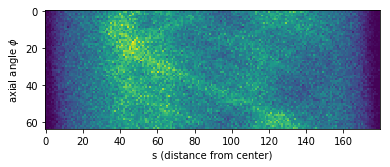

In [1549]:
# Show the set of sinograms, summed over TOF.
plt.imshow(np.sum(sinograms[:,:,:,:],axis=(0,1)))
plt.xlabel("s (distance from center)")
plt.ylabel("axial angle $\phi$")
print(np.sum(sinograms))
# true 10M: 857669 coincidences (0.1pi opening angle)

## Perform the reconstruction (some code from SIRF exercise notebooks)

In [1550]:
# Extract the circular profile with radius r from the specified 2D image.
def circular_profile(img2d,r,bins):
    
    cx = int((img2d.shape[0]-1)/2)
    cy = int((img2d.shape[1]-1)/2)
    
    phis = np.arange(0,2*np.pi,2*np.pi/bins)
    phis += np.pi/6
    prof = np.zeros(bins)
    
    for i,phi in enumerate(phis):
        
        x = cx + int(r*np.cos(phi))
        y = cy + int(r*np.sin(phi))
        #print("Selecting x,y = {},{}".format(x,y))
        
        prof[i] = img2d[x,y]
        
    return prof

In [1551]:
use_TOF = True

In [1552]:
if(use_TOF): 
    data = sinograms
else:
    # Sum over all TOF bins.
    data = np.sum(sinograms,axis=0).reshape([1,sinograms.shape[1],sinograms.shape[2],sinograms.shape[3]])

In [1553]:
if(use_TOF): 
    templ = pet.AcquisitionData('template_sinogram_PETALO_NEMA.hs')
else:
    templ = pet.AcquisitionData('template_sinogram_PETALO_NEMA_noTOF.hs')
    
# Load the data into the AcquisitionData object.
daq = templ.get_uniform_copy(data)

# Check that the dimensions are correct.
acquisition_array = daq.as_array()
print(acquisition_array.shape)

(13, 1, 64, 180)


In [1559]:
# Perform the reconstruction.
obj_fun = pet.make_Poisson_loglikelihood(daq)
recon = pet.OSMAPOSLReconstructor()
recon.set_objective_function(obj_fun)
recon.set_num_subsets(4)
num_iters=20
recon.set_num_subiterations(num_iters)

# create initial image estimate of dimensions and voxel sizes
# compatible with the scanner geometry (included in the AcquisitionData
# object acq_data) and initialize each voxel to 1.0
nxny = (60, 60)
initial_image = daq.create_uniform_image(1.0, nxny)
recon.set_up(initial_image)

# set the initial image estimate
recon.set_current_estimate(initial_image)
# reconstruct
recon.process()
# show reconstructed image
image_array = recon.get_current_estimate().as_array()
print(image_array.shape)
image_array *= 4/(np.max(image_array))

(1, 60, 60)


Text(0,0.5,'y (mm)')

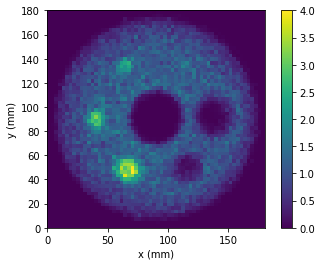

In [1560]:
plt.imshow(image_array[0,:,:].transpose(),extent=[0,180,0,180],origin='lower')
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

In [1556]:
# Store the image for making the final plot (note this needs to be run once with TOF and once without)
if(use_TOF):
    img_TOF = image_array
else:
    img_noTOF = image_array

In [1557]:
# Read in the original phantom.
fn = np.load("/home/jrenner/production/petalo/phantoms/phantom_NEMAlike.npz")
phantom = fn['phantom']

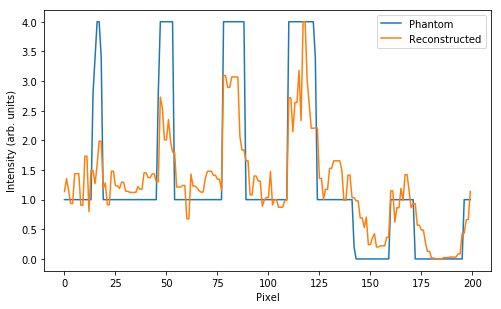

In [1558]:
fig = plt.figure(1); fig.set_figheight(4.8); fig.set_figwidth(8.0)

prof_phantom = circular_profile(np.sum(phantom[:,:,86:91]/5,axis=2),50,200)
prof_reco = circular_profile(image_array[0,:,:],53.*60/180,200)
prof_reco *= 4/np.max(prof_reco)
plt.plot(range(len(prof_phantom)),prof_phantom,label="Phantom")
plt.plot(range(len(prof_reco)),prof_reco,label="Reconstructed")
plt.ylabel("Intensity (arb. units)")
plt.xlabel("Pixel")
plt.legend(loc=1)

In [ ]:
# Get the original simulated image.
image = pet.ImageData('emission.hv')
img_original = image.as_array().reshape([155,155,1])

In [ ]:
fig = plt.figure()
fig.set_figheight(4.8)
fig.set_figwidth(15.0)

ax1 = fig.add_subplot(131) 
plt.imshow(img_original[:,:,0])
plt.title("Simulated distribution")

ax2 = fig.add_subplot(132)
plt.imshow(img_noTOF[0,:,:])
plt.title("PETALO true MC, no TOF")

ax3 = fig.add_subplot(133)
plt.imshow(img_TOF[0,:,:])
plt.title("PETALO true MC, TOF (200 ps resolution)")

# Fast Monte Carlo simulation of LORs

In [1573]:
# Class to store the error matrix and relevant information.
# Note that errors are always expressed in (true - reco).
class errmat:
    
    def __init__(self,errmat,eff,xmin,ymin,dx,dy):
        
        # The coordinate matrix is the sum along the error dimension.
        self.coordmat = np.sum(errmat,axis=1)
        
        # Normalize the error matrix along the error dimension.
        for i in range(len(self.coordmat)):
            errmat[i,:] = errmat[i,:]/self.coordmat[i]
            
        # Normalize the coordinate matrix.
        self.coordmat /= np.sum(self.coordmat)
        print(xmin)
        print(dx)
        
        # Save the relevant variables.
        self.errmat = errmat
        self.xmin = xmin
        self.ymin = ymin
        self.dx = dx
        self.dy = dy
    
    # Select a random coordinate.
    def get_random_coord(self):
        i = np.random.choice(len(self.coordmat),p=self.coordmat)
        return self.xmin + (i + np.random.uniform())*self.dx
    
    # Select a random error for the specified coordinate.
    def get_random_error(self,x):
        i = int((x - self.xmin)/self.dx)
        if(i >= len(self.errmat)): i = len(self.errmat)-1
        edist = self.errmat[i]
        j = np.random.choice(len(edist),p=edist)
        return self.ymin + (j + np.random.uniform())*self.dy

def read_errmat(matfile):
    fn = np.load(matfile)
    return errmat(fn['errmat'],fn['eff'],fn['xmin'],fn['ymin'],fn['dx'],fn['dy'])

In [1576]:
# Read in the relevant matrices.
errmat_r = read_errmat('/home/jrenner/analysis/petalo/errmat/errmat_r.npz')
errmat_r_direct = read_errmat('/home/jrenner/analysis/petalo/errmat/errmat_r_direct.npz')
errmat_phi = read_errmat('/home/jrenner/analysis/petalo/errmat/errmat_phi.npz')
errmat_z = read_errmat('/home/jrenner/analysis/petalo/errmat/errmat_z_NN_15mm.npz')

380.00048750128275
0.2997620887192056
380.0317646434475
0.29901480661538926
-3.14157772064209
0.06283136844634996
-939.3309326171875
18.869476318359375


In [1577]:
# Read in the phantom to simulate.
fn = np.load("/home/jrenner/production/petalo/phantoms/phantom_NEMAlike.npz")
npimg = fn['phantom']
npimg = npimg.astype('float64') / np.sum(npimg)

In [1578]:
npdist = npimg.flatten()
dZ = 10
dR = 380
clight = 3.0e11 # speed of light in mm/s

rmin = 380.0
rmax = 410.0
zmax = 450
zmin = -450
#zmax = 969.5
#zmin = -969.5

# coslim is the cosine of (pi/2 - th), where th is the maximum opening angle in z-direction
#coslim = dZ/(dZ**2+dR**2)**0.5
coslim = 0.309
#coslim = -1
Nevts = 10000000

Nx = npimg.shape[0]
Ny = npimg.shape[1]
Nz = npimg.shape[2]
Lx = float(Nx)
Ly = float(Ny)
Lz = float(Nz)

NyNz = Ny*Nz

print("Dist with length ",len(npdist)," and Nx = ",Nx," Ny = ",Ny," Nz = ",Nz)
print("Cosine limit = ",coslim)

('Dist with length ', 5832000, ' and Nx = ', 180, ' Ny = ', 180, ' Nz = ', 180)
('Cosine limit = ', 0.309)


## Generate the true and "reconstructed" coordinates

### Formula for solving for radial distance from emission point to interaction point (r*)

$(r^*)^2\sin^2\theta + 2(x_0\cos\phi\sin\theta + y_0\sin\phi\sin\theta)r^* + r_0^2-r_p^2-z_0^2$ = 0

where $r_p$ is the selected random radius (in the x-y plane)

In [ ]:
# Pick a random number for the location of the emission point.
ievts = np.random.choice(len(npdist),Nevts,p=npdist)

# Compute the cosines and sines of the axial angle.
phis = np.random.uniform(size=Nevts)*2*np.pi
cosines_phi = np.cos(phis)
sines_phi = np.sin(phis)

a_event_ids = []
a_true_r1 = []; a_true_phi1 = []; a_true_z1 = []; a_true_t1 = []
a_true_r2 = []; a_true_phi2 = []; a_true_z2 = []; a_true_t2 = []
a_reco_r1 = []; a_reco_phi1 = []; a_reco_z1 = []; a_reco_t1 = []
a_reco_r2 = []; a_reco_phi2 = []; a_reco_z2 = []; a_reco_t2 = []

#for ievt,(ii,cth,sth,cphi,sphi,phi) in enumerate(zip(ievts,cosines_th,sines_th,cosines_phi,sines_phi,phis)):
for ievt,(ii,cphi,sphi,phi) in enumerate(zip(ievts,cosines_phi,sines_phi,phis)):
    
    # Determine the point from which the gammas are emitted.
    nnx = int(ii / NyNz)
    nny = int(ii/Nz) % Ny
    nnz = int(ii) % Nz
    xpt = Lx*(1.0*nnx/Nx - 0.5)
    ypt = Ly*(1.0*nny/Ny - 0.5)
    zpt = Lz*(1.0*nnz/Nz - 0.5)

    # Compute the azimuthal angle.
    if(coslim < 0):
        clim_high = (zmax - zpt)/(rmin**2 + (zmax-zpt)**2)**0.5
        clim_low = (zmin - zpt)/(rmin**2 + (zmin-zpt)**2)**0.5
        clim = min(abs(clim_low),abs(clim_high))
        cth = np.random.uniform(-clim,clim)
        #print("Casting cosine from {} to {}".format(clim_low,clim_high))
    else:
        cth = np.random.uniform(-coslim,coslim)
    sth = (1-cth**2)**0.5
    
    # Get 2 random radii.
    rc1 = errmat_r.get_random_coord()
    rc2 = errmat_r.get_random_coord()
    
    # Assume distribution of radial coordinate follows stopping power.
    #rc1 = (errmat_r_direct.get_random_coord()-errmat_r_direct.xmin)*np.abs(sth) + errmat_r_direct.xmin
    #rc2 = (errmat_r_direct.get_random_coord()-errmat_r_direct.xmin)*np.abs(sth) + errmat_r_direct.xmin
    
    # Determine the radii extending from the emission point for the corresponding random radii
    #  (which extend from the origin).  Note that these radii are in the x-y plane.
    rpt_sq = xpt**2 + ypt**2 + zpt**2
    b1 = 2*(xpt*cphi*sth + ypt*sphi*sth)
    c1 = rpt_sq - rc1**2 - zpt**2
    rp1 = np.max(np.roots([sth**2, b1, c1]))*np.abs(sth)
    #print("Roots are {}".format(np.roots([1., b1, c1])))
    
    b2 = -b1
    c2 = rpt_sq - rc2**2 - zpt**2
    rp2 = np.max(np.roots([sth**2, b2, c2]))*np.abs(sth)
    
    # Compute the full radii from the emission point to each interaction point (including z).
    rstar1 = rp1/np.abs(sth)
    rstar2 = rp2/np.abs(sth)
    
    # Compute the two "interaction points".
    x1 = xpt + rstar1*cphi*sth
    x2 = xpt - rstar2*cphi*sth
    y1 = ypt + rstar1*sphi*sth
    y2 = ypt - rstar2*sphi*sth
    z1 = zpt + rstar1*cth
    z2 = zpt - rstar2*cth
    
    # Convert to cylindrical coordinates.
    r1 = (x1**2 + y1**2)**0.5  # This should be equal to rc1
    #print("r1 = {}, rc1 = {}".format(r1,rc1))
    phi1 = np.arctan2(y1,x1)
    r2 = (x2**2 + y2**2)**0.5
    phi2 = np.arctan2(y2,x2)
    
    # Get all errors.
    er1 = errmat_r.get_random_error(r1)
    er2 = errmat_r.get_random_error(r2)
    ephi1 = errmat_phi.get_random_error(phi1)
    ephi2 = errmat_phi.get_random_error(phi2)
    ez1 = errmat_z.get_random_error(z1)
    ez2 = errmat_z.get_random_error(z2)
    
    # Compute reconstructed quantities.
    r1_reco = r1 - er1
    r2_reco = r2 - er2
    phi1_reco = phi1 - ephi1
    phi2_reco = phi2 - ephi2
    z1_reco = z1 - ez1
    z2_reco = z2 - ez2
    
    # Compute (in ns) the TOF
    tof = 1.0e9*(((x2-xpt)**2 + (y2-ypt)**2 + (z2-zpt)**2)**0.5 - ((x1-xpt)**2 + (y1-ypt)**2 + (z1-zpt)**2)**0.5)/clight
    
    a_event_ids.append(ievt)
    a_true_r1.append(r1)
    a_true_phi1.append(phi1)
    a_true_t1.append(0.)
    a_true_z1.append(z1)
    a_true_r2.append(r2)
    a_true_phi2.append(phi2)
    a_true_z2.append(z2)
    a_true_t2.append(tof)
    
    a_reco_r1.append(r1_reco)
    a_reco_r2.append(r2_reco)
    a_reco_phi1.append(phi1_reco)
    a_reco_phi2.append(phi2_reco)
    a_reco_z1.append(z1_reco)
    a_reco_z2.append(z2_reco)
    
    if(ievt % (Nevts/10) == 0):
        print("Done {} events".format(ievt))
        
np.savez("mc_NEMAlike_10M_coslim_NN_15mm.npz", a_event_ids=a_event_ids,
                  a_true_r1=a_true_r1,a_true_phi1=a_true_phi1,a_true_z1=a_true_z1,a_true_t1=a_true_t1,
                  a_true_r2=a_true_r2,a_true_phi2=a_true_phi2,a_true_z2=a_true_z2,a_true_t2=a_true_t2,
                  a_reco_r1=a_reco_r1,a_reco_phi1=a_reco_phi1,a_reco_z1=a_reco_z1,
                  a_reco_r2=a_reco_r2,a_reco_phi2=a_reco_phi2,a_reco_z2=a_reco_z2)

Done 0 events
Done 1000000 events
Done 2000000 events
Done 3000000 events
Done 4000000 events
Done 5000000 events
Done 6000000 events


# Validation of fast MC

In [1131]:
(D_evt_fastMC,D_true_r1_fastMC,D_true_phi1_fastMC,D_true_z1_fastMC,D_true_t1_fastMC,
 D_true_r2_fastMC,D_true_phi2_fastMC,D_true_z2_fastMC,D_true_t2_fastMC,
 D_reco_r1_fastMC,D_reco_phi1_fastMC,D_reco_z1_fastMC,
 D_reco_r2_fastMC,D_reco_phi2_fastMC,D_reco_z2_fastMC) = read_datafile('mc_NEMAlike_337k_fullZ_rfixed_coslim.npz')
print("Read {} coincidences".format(len(D_evt_fastMC)))

Read 337628 coincidences


In [1132]:
(D_evt_fullMC,D_true_r1_fullMC,D_true_phi1_fullMC,D_true_z1_fullMC,D_true_t1_fullMC,
 D_true_r2_fullMC,D_true_phi2_fullMC,D_true_z2_fullMC,D_true_t2_fullMC,
 D_reco_r1_fullMC,D_reco_phi1_fullMC,D_reco_z1_fullMC,
 D_reco_r2_fullMC,D_reco_phi2_fullMC,D_reco_z2_fullMC) = read_datafile('/home/jrenner/analysis/petalo/MC/phantom_NEMAlike_reco/phantom_NEMAlike_DNN.npz')
print("Read {} coincidences".format(len(D_evt_fullMC)))

Read 337628 coincidences


In [1133]:
all_reco_r_fullMC = np.concatenate([D_reco_r1_fullMC, D_reco_r2_fullMC])
all_reco_r_fastMC = np.concatenate([D_reco_r1_fastMC, D_reco_r2_fastMC])
all_true_r_fullMC = np.concatenate([D_true_r1_fullMC, D_true_r2_fullMC])
all_true_r_fastMC = np.concatenate([D_true_r1_fastMC, D_true_r2_fastMC])

all_reco_phi_fullMC = np.concatenate([D_reco_phi1_fullMC, D_reco_phi2_fullMC])
all_reco_phi_fastMC = np.concatenate([D_reco_phi1_fastMC, D_reco_phi2_fastMC])
all_true_phi_fullMC = np.concatenate([D_true_phi1_fullMC, D_true_phi2_fullMC])
all_true_phi_fastMC = np.concatenate([D_true_phi1_fastMC, D_true_phi2_fastMC])

all_reco_z_fullMC = np.concatenate([D_reco_z1_fullMC, D_reco_z2_fullMC])
all_reco_z_fastMC = np.concatenate([D_reco_z1_fastMC, D_reco_z2_fastMC])
all_true_z_fullMC = np.concatenate([D_true_z1_fullMC, D_true_z2_fullMC])
all_true_z_fastMC = np.concatenate([D_true_z1_fastMC, D_true_z2_fastMC])

## Validate R

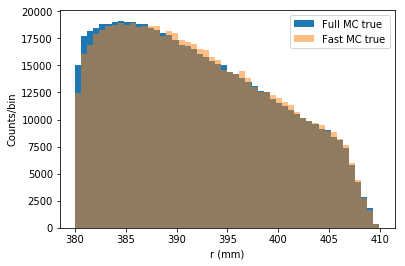

In [1150]:
plt.hist(all_true_r_fullMC,bins=50,label='Full MC true')
plt.hist(all_true_r_fastMC,bins=50,alpha=0.5,label='Fast MC true')
plt.xlabel("r (mm)")
plt.ylabel("Counts/bin")
plt.legend()

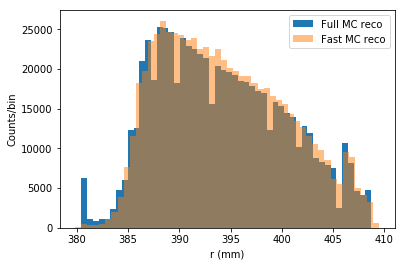

In [1151]:
plt.hist(all_reco_r_fullMC,bins=50,label='Full MC reco')
plt.hist(all_reco_r_fastMC,bins=50,alpha=0.5,label='Fast MC reco')
plt.xlabel("r (mm)")
plt.ylabel("Counts/bin")
plt.legend()

## Validate phi

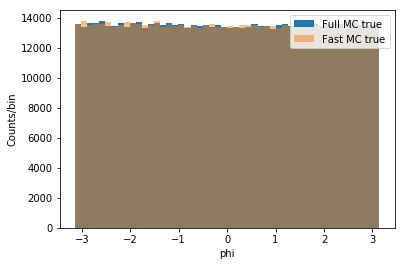

In [1152]:
plt.hist(all_true_phi_fullMC,bins=50,label='Full MC true')
plt.hist(all_true_phi_fastMC,bins=50,alpha=0.5,label='Fast MC true')
plt.xlabel("phi")
plt.ylabel("Counts/bin")
plt.legend()

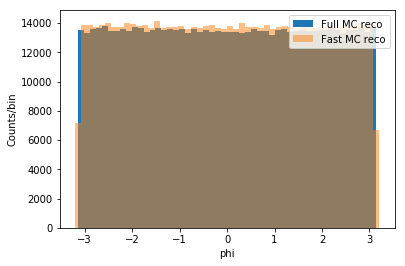

In [1153]:
plt.hist(all_reco_phi_fullMC,bins=50,label='Full MC reco')
plt.hist(all_reco_phi_fastMC,bins=50,alpha=0.5,label='Fast MC reco')
plt.xlabel("phi")
plt.ylabel("Counts/bin")
plt.legend()

## Validate z

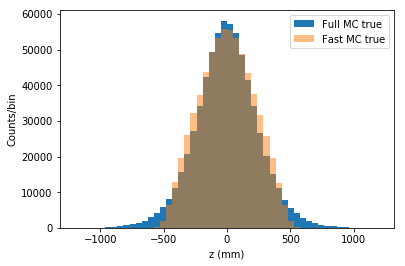

In [1154]:
plt.hist(all_true_z_fullMC,bins=50,range=(-1200,1200),label='Full MC true')
plt.hist(all_true_z_fastMC,bins=50,range=(-1200,1200),alpha=0.5,label='Fast MC true')
plt.xlabel("z (mm)")
plt.ylabel("Counts/bin")
plt.legend()

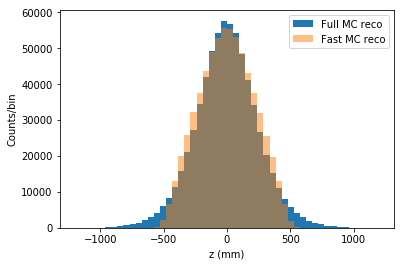

In [1155]:
plt.hist(all_reco_z_fullMC,bins=50,range=(-1200,1200),label='Full MC reco')
plt.hist(all_reco_z_fastMC,bins=50,range=(-1200,1200),alpha=0.5,label='Fast MC reco')
plt.xlabel("z (mm)")
plt.ylabel("Counts/bin")
plt.legend()

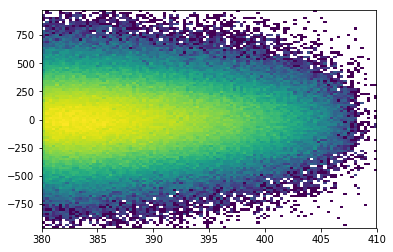

In [1156]:
#h_z, xedges_z, yedges_z, img_z = plt.hist2d(all_true_r_fullMC,all_true_z_fullMC,bins=100)
h_z, xedges_z, yedges_z, img_z = plt.hist2d(D_true_r2_fullMC,D_true_z1_fullMC,bins=100,norm=LogNorm())